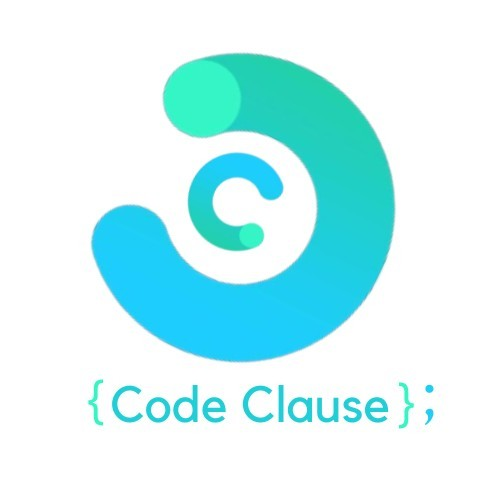

#**TASK -2 Market Basket Analysis in Python using Apriori Algorithm:**



NAME:G.HARINISRI


First Task: Implement the Apriori algorithm to find all frequent patterns under different settings of the minimum frequency (minimum support/#transactions). Vary the minimum frequency minFreq as 0.0001, 0.0002, 0.0003, 0.0004 and 0.0005. Report the number of frequent patterns, as well as the number of size-K frequent patterns for each size with at least one frequent pattern, under each setting of minFreq.

Second Task: Try to optimize your algorithm using acceleration techniques. Try to make your algorithm finish computing for the task in (1) within 10 mins. Explain each specific acceleration you adopt by providing a running time comparison between adopting the acceleration and not adopting the acceleration.

IMPORTING THE PACKAGES

In [1]:
from collections import defaultdict
from itertools import combinations
from datetime import datetime

In [2]:
def Merge(dict1, dict2):
    res = {**dict1, **dict2}
    return res

In [3]:
class Apriori:
    def __init__(self, filename):
        self.Transactions = list()
        self.C_one = defaultdict(int)
        self.file = filename
        self.L_one = defaultdict(int)
        self.K = 1
        self.GlobalFreqItem = defaultdict(int)
    
    def Return_TBD(self):
        return self.Transactions
    
    def ExtractData(self):
        with open(self.file,'r') as file:
            data = file.readlines()
            for i in data:
                temp = frozenset(map(int,i.split()))
                self.Transactions.append(temp)
                
                for item in temp:
                    self.C_one[frozenset([item])] +=1

    def Extract_Freq_Items(self,C_k,threshold):
        return {k:v for k,v in C_k.items() if v >= threshold}
    
    def Candidate_Generation(self,prev_freq_items,k):
        return set([i.union(j) for i in prev_freq_items for j in prev_freq_items if len(i.union(j)) == k])
    
    def Count_Support(self,Candidates_Set,k):
        C_k = defaultdict(int)
        for i in self.Transactions:
            if len(i) == k:
                if i in Candidates_Set:
                    C_k[i] += 1
            elif len(i) > k:
                subsets = list(combinations(i,k))
                for j in subsets:
                    if frozenset(j) in Candidates_Set:
                        C_k[frozenset(j)] += 1
        return C_k
    
    def apriori(self,Min_Freq):
        start_time = datetime.now()
        self.ExtractData()
        min_sup = Min_Freq*len(self.Transactions)
        self.L_one = self.Extract_Freq_Items(self.C_one,min_sup)
        prev_freq_items = self.L_one.copy()
        self.GlobalFreqItem[self.K] = prev_freq_items
        while (len(prev_freq_items) > 0):
            candidates = self.Candidate_Generation(prev_freq_items.keys(),self.K+1)
            C_k = self.Count_Support(candidates,self.K+1)
            prev_freq_items = self.Extract_Freq_Items(C_k,min_sup)
            self.K+=1
            self.GlobalFreqItem[self.K] = prev_freq_items

        end_time = datetime.now()
        time_taken = end_time - start_time

        return self.GlobalFreqItem,time_taken

In [5]:
Time = list()
Patterns = {}
for i in [0.0001,0.0002,0.0003,0.0004,0.0005]:
    Patterns[i] = {}
    apriori = Apriori('/content/drive/MyDrive/CODECLAUSE INTERNSHIP/trans.txt')
    Items,T = apriori.apriori(Min_Freq=i)
    Time.append(T)
    for j in range(1,len(Items)):
        Patterns[i] = Merge(Items[j],Patterns[i])

In [6]:
import math
delta = 0.01
epsilon = 0.005
D = 7
sample_size = int(1/(math.pow(epsilon,2))*(D + math.log10(1/delta)))
print(sample_size)

360000


In [7]:
import random
from random import sample
random.seed(25)

In [8]:
class Sample_Apriori:
    def __init__(self, filename):
        self.Transactions = list()
        self.Sample_Transactions = list()
        self.C_one = defaultdict(int)
        self.file = filename
        self.L_one = defaultdict(int)
        self.K = 1
        self.GlobalFreqItem = defaultdict(int)
    
    def Return_TBD(self,sample_size):
        return self.Transactions
    
    def ExtractData(self,sample_size):
        with open(self.file,'r') as file:
            data = file.readlines()
            for i in data:
                temp = frozenset(map(int,i.split()))
                self.Transactions.append(temp)
        
        self.Sample_Transactions = sample(self.Transactions,sample_size)
        for i in self.Sample_Transactions:
            for item in i:
                self.C_one[frozenset([item])] +=1

    def Extract_Freq_Items(self,C_k,threshold):
        return {k:v for k,v in C_k.items() if v >= threshold}
    
    def Candidate_Generation(self,prev_freq_items,k):
        return set([i.union(j) for i in prev_freq_items for j in prev_freq_items if len(i.union(j)) == k])
    
    def Count_Support(self,Candidates_Set,k):
        C_k = defaultdict(int)
        for i in self.Sample_Transactions:
            if len(i) == k:
                if i in Candidates_Set:
                    C_k[i] += 1
            elif len(i) > k:
                subsets = list(combinations(i,k))
                for j in subsets:
                    if frozenset(j) in Candidates_Set:
                        C_k[frozenset(j)] += 1
        return C_k
    
    def apriori(self,Min_Freq,sample_size):
        start_time = datetime.now()
        self.ExtractData(sample_size)
        min_sup = Min_Freq*len(self.Sample_Transactions)
        self.L_one = self.Extract_Freq_Items(self.C_one,min_sup)
        prev_freq_items = self.L_one.copy()
        self.GlobalFreqItem[self.K] = prev_freq_items
        while (len(prev_freq_items) > 0):
            candidates = self.Candidate_Generation(prev_freq_items.keys(),self.K+1)
            C_k = self.Count_Support(candidates,self.K+1)
            prev_freq_items = self.Extract_Freq_Items(C_k,min_sup)
            self.K+=1
            self.GlobalFreqItem[self.K] = prev_freq_items

        end_time = datetime.now()
        time_taken = end_time - start_time

        return self.GlobalFreqItem,time_taken

In [9]:
Sample_Time = list()
Sample_Patterns = {}
for i in [0.0001,0.0002,0.0003,0.0004,0.0005]:
    Sample_Patterns[i] = {}
    apriori = Sample_Apriori('/content/drive/MyDrive/CODECLAUSE INTERNSHIP/trans.txt')
    Items,T = apriori.apriori(Min_Freq=i,sample_size=sample_size)
    Sample_Time.append(T)
    for j in range(1,len(Items)):
        Sample_Patterns[i] = Merge(Items[j],Sample_Patterns[i])

In [10]:
Time

[datetime.timedelta(seconds=104, microseconds=552380),
 datetime.timedelta(seconds=42, microseconds=526434),
 datetime.timedelta(seconds=31, microseconds=849188),
 datetime.timedelta(seconds=23, microseconds=484034),
 datetime.timedelta(seconds=21, microseconds=615383)]

In [11]:
Sample_Time

[datetime.timedelta(seconds=94, microseconds=613618),
 datetime.timedelta(seconds=31, microseconds=937774),
 datetime.timedelta(seconds=24, microseconds=402582),
 datetime.timedelta(seconds=18, microseconds=959883),
 datetime.timedelta(seconds=16, microseconds=40119)]

In [12]:
False_Negatives = {}
for i in Patterns.keys():
    False_Negatives[i] = {k:v for k,v in Patterns[i].items() if k not in Sample_Patterns[i]}

In [14]:
False_Positives = {}
for i in Patterns.keys():
    False_Positives[i] = {k:v for k,v in Sample_Patterns[i].items() if k not in Patterns[i]}

In [16]:
for i in False_Negatives.keys():
    print("False Negatives with min freq = {} :".format(i),len(False_Negatives[i]))

False Negatives with min freq = 0.0001 : 821
False Negatives with min freq = 0.0002 : 255
False Negatives with min freq = 0.0003 : 165
False Negatives with min freq = 0.0004 : 95
False Negatives with min freq = 0.0005 : 54


In [17]:
for i in False_Positives.keys():
    print("False Positives with min freq = {} :".format(i),len(False_Positives[i]))

False Positives with min freq = 0.0001 : 1200
False Positives with min freq = 0.0002 : 382
False Positives with min freq = 0.0003 : 161
False Positives with min freq = 0.0004 : 123
False Positives with min freq = 0.0005 : 76


Market Basket Analysis using Apriori Algorithm on grocery data for generating frequent item sets that are purchased together. The findings from the Apriori Alorithm can be used by the Marketing Team to formulate strategies for increasing sales.

In [18]:
### Importing the required libraries.
##

import numpy as np
import pandas as pd
import matplotlib as mp
from   matplotlib import pyplot as plt
from   mlxtend.frequent_patterns import apriori as ap
from   mlxtend.frequent_patterns import association_rules as ar

In [20]:
## Let's import the dataset from local system.
##

csv_path = '/content/drive/MyDrive/CODECLAUSE INTERNSHIP/items_purchased_data.csv'
items_data_df  = pd.read_csv(csv_path, header=None)
print(items_data_df.head())

              0          1           2                 3             4   \
0         shrimp    almonds     avocado    vegetables mix  green grapes   
1        burgers  meatballs        eggs               NaN           NaN   
2        chutney        NaN         NaN               NaN           NaN   
3         turkey    avocado         NaN               NaN           NaN   
4  mineral water       milk  energy bar  whole wheat rice     green tea   

                 5     6               7             8             9   \
0  whole weat flour  yams  cottage cheese  energy drink  tomato juice   
1               NaN   NaN             NaN           NaN           NaN   
2               NaN   NaN             NaN           NaN           NaN   
3               NaN   NaN             NaN           NaN           NaN   
4               NaN   NaN             NaN           NaN           NaN   

               10         11     12     13             14      15  \
0  low fat yogurt  green tea  honey  sala

In [21]:
## Majority of the records have Na or NaN. Let's analyze how many unique values we have.
##

unique_items = (items_data_df[0].unique())
print(unique_items)


['shrimp' 'burgers' 'chutney' 'turkey' 'mineral water' 'low fat yogurt'
 'whole wheat pasta' 'soup' 'frozen vegetables' 'french fries' 'eggs'
 'cookies' 'spaghetti' 'meatballs' 'red wine' 'rice' 'parmesan cheese'
 'ground beef' 'sparkling water' 'herb & pepper' 'pickles' 'energy bar'
 'fresh tuna' 'escalope' 'avocado' 'tomato sauce' 'clothes accessories'
 'energy drink' 'chocolate' 'grated cheese' 'yogurt cake' 'mint'
 'asparagus' 'champagne' 'ham' 'muffins' 'french wine' 'chicken' 'pasta'
 'tomatoes' 'pancakes' 'frozen smoothie' 'carrots' 'yams' 'shallot'
 'butter' 'light mayo' 'pepper' 'candy bars' 'cooking oil' 'milk'
 'green tea' 'bug spray' 'oil' 'olive oil' 'salmon' 'cake' 'almonds'
 'salt' 'strong cheese' 'hot dogs' 'pet food' 'whole wheat rice'
 'antioxydant juice' 'honey' 'sandwich' 'salad' 'magazines' 'protein bar'
 'mayonnaise' 'cider' 'burger sauce' 'green grapes' 'vegetables mix'
 'bramble' 'nonfat milk' 'tomato juice' 'green beans' 'strawberries'
 'eggplant' 'mushroom cre

In [22]:
## Based on the unique items we got, we will perform one-hot-encoding.The dataset will be converted to a format that has just 0s or 1s. It can also have True or False.Custom One Hot Encoding Python code for one hot encoding


encoded_vals        = []
for i, rows in items_data_df.iterrows():
	labels          = {}
	uncommons       = list(set(unique_items) - set(rows))
	commons         = list(set(unique_items).intersection(rows))
	for uc in uncommons:
		labels[uc]  = 0
	for com in commons:
		labels[com] = 1
	encoded_vals.append(labels)
encoded_vals[0]

encode_df           = pd.DataFrame(encoded_vals)

print(encode_df.head())


   body spray  mint green tea  extra dark chocolate  cauliflower  light mayo  \
0           0               0                     0            0           0   
1           0               0                     0            0           0   
2           0               0                     0            0           0   
3           0               0                     0            0           0   
4           0               0                     0            0           0   

   salt  parmesan cheese  rice  burger sauce  gluten free bar  ...  yams  \
0     0                0     0             0                0  ...     1   
1     0                0     0             0                0  ...     0   
2     0                0     0             0                0  ...     0   
3     0                0     0             0                0  ...     0   
4     0                0     0             0                0  ...     0   

   honey  low fat yogurt  whole weat flour  frozen smoothie  s

In [26]:
## Defining the apriori algorithm.
freq_items = ap(encode_df, min_support=0.0085, use_colnames=True  )
print(freq_items.head())


    support                itemsets
0  0.011465            (body spray)
1  0.011998  (extra dark chocolate)
2  0.027196            (light mayo)
3  0.009199                  (salt)
4  0.019864       (parmesan cheese)


In [27]:
## Defining the association rules algorithms to match and find similar items together based on confidence.

assocn_rules_conf   = ar(freq_items, metric="confidence", min_threshold=0.25)
print(assocn_rules_conf)

                      antecedents      consequents  antecedent support  \
0                          (milk)      (spaghetti)            0.129583   
1                      (tomatoes)      (spaghetti)            0.068391   
2                      (hot dogs)      (spaghetti)            0.032396   
3                       (chicken)      (spaghetti)            0.059992   
4                        (turkey)      (spaghetti)            0.062525   
..                            ...              ...                 ...   
132             (chocolate, eggs)  (mineral water)            0.033196   
133  (mineral water, ground beef)      (chocolate)            0.040928   
134      (chocolate, ground beef)  (mineral water)            0.023064   
135     (mineral water, pancakes)      (chocolate)            0.033729   
136         (chocolate, pancakes)  (mineral water)            0.019864   

     consequent support   support  confidence      lift  leverage  conviction  
0              0.174110  0.0354

In [28]:
## Defining the association rules algorithms to match and find similar items together based on support.

assocn_rules_supp   = ar(freq_items, metric="support", min_threshold=0.005)
print(assocn_rules_supp)

                   antecedents                 consequents  \
0                       (milk)                 (spaghetti)   
1                  (spaghetti)                      (milk)   
2                   (tomatoes)                 (spaghetti)   
3                  (spaghetti)                  (tomatoes)   
4               (french fries)                 (spaghetti)   
..                         ...                         ...   
615  (mineral water, pancakes)                 (chocolate)   
616      (chocolate, pancakes)             (mineral water)   
617            (mineral water)       (chocolate, pancakes)   
618                (chocolate)   (mineral water, pancakes)   
619                 (pancakes)  (mineral water, chocolate)   

     antecedent support  consequent support   support  confidence      lift  \
0              0.129583            0.174110  0.035462    0.273663  1.571779   
1              0.174110            0.129583  0.035462    0.203675  1.571779   
2              0.0

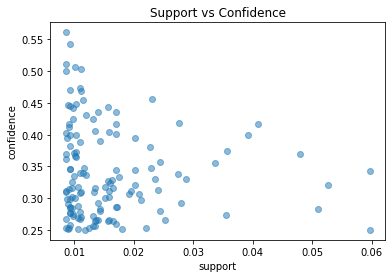

In [29]:
## Plotting the scatter plot of Confidence Vs Support

plt.scatter(assocn_rules_conf['support'], assocn_rules_conf['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()


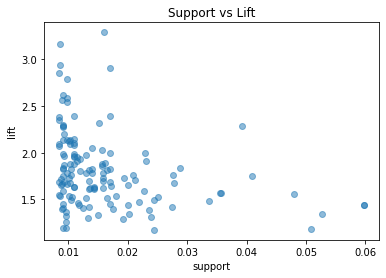

In [30]:
## Plotting the scatter plot of Lift Vs Support


plt.scatter(assocn_rules_conf['support'], assocn_rules_conf['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

In [32]:
## Writing the generated rules based on confidence onto a excel file for business use.


w1 = pd.ExcelWriter('/content/drive/MyDrive/CODECLAUSE INTERNSHIP/Generated_Rules_conf.xlsx')
assocn_rules_conf.to_excel(w1, 'Rules')
w1.save() 

In [36]:
w1=pd.read_excel("/content/drive/MyDrive/CODECLAUSE INTERNSHIP/Generated_Rules_conf.xlsx")
w1

,Unnamed: 0,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,0,frozenset({'milk'}),frozenset({'spaghetti'}),0.129583,0.174110,0.035462,0.273663,1.571779,0.012900,1.137061
1,1,frozenset({'tomatoes'}),frozenset({'spaghetti'}),0.068391,0.174110,0.020931,0.306043,1.757755,0.009023,1.190117
2,2,frozenset({'hot dogs'}),frozenset({'spaghetti'}),0.032396,0.174110,0.008666,0.267490,1.536325,0.003025,1.127479
3,3,frozenset({'chicken'}),frozenset({'spaghetti'}),0.059992,0.174110,0.017198,0.286667,1.646468,0.006752,1.157790
4,4,frozenset({'turkey'}),frozenset({'spaghetti'}),0.062525,0.174110,0.016531,0.264392,1.518535,0.005645,1.122731
...,...,...,...,...,...,...,...,...,...,...
132,132,"frozenset({'chocolate', 'eggs'})",frozenset({'mineral water'}),0.033196,0.238368,0.013465,0.405622,1.701663,0.005552,1.281394
133,133,"frozenset({'mineral water', 'ground beef'})",frozenset({'chocolate'}),0.040928,0.163845,0.010932,0.267101,1.630207,0.004226,1.140887
134,134,"frozenset({'chocolate', 'ground beef'})",frozenset({'mineral water'}),0.023064,0.238368,0.010932,0.473988,1.988472,0.005434,1.447937
135,135,"frozenset({'mineral water', 'pancakes'})",frozenset({'chocolate'}),0.033729,0.163845,0.009332,0.276680,1.688670,0.003806,1.155996


In [33]:
## Writing the generated rules based on support onto a excel file for business use.
##

w2 = pd.ExcelWriter('/content/drive/MyDrive/CODECLAUSE INTERNSHIP/Generated_Rules_supp.xlsx')
assocn_rules_supp.to_excel(w2, 'Rules')
w2.save()

In [37]:
w2=pd.read_excel("/content/drive/MyDrive/CODECLAUSE INTERNSHIP/Generated_Rules_supp.xlsx")
w2

,Unnamed: 0,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,0,frozenset({'milk'}),frozenset({'spaghetti'}),0.129583,0.174110,0.035462,0.273663,1.571779,0.012900,1.137061
1,1,frozenset({'spaghetti'}),frozenset({'milk'}),0.174110,0.129583,0.035462,0.203675,1.571779,0.012900,1.093043
2,2,frozenset({'tomatoes'}),frozenset({'spaghetti'}),0.068391,0.174110,0.020931,0.306043,1.757755,0.009023,1.190117
3,3,frozenset({'spaghetti'}),frozenset({'tomatoes'}),0.174110,0.068391,0.020931,0.120214,1.757755,0.009023,1.058905
4,4,frozenset({'french fries'}),frozenset({'spaghetti'}),0.170911,0.174110,0.027596,0.161466,0.927381,-0.002161,0.984922
...,...,...,...,...,...,...,...,...,...,...
615,615,"frozenset({'mineral water', 'pancakes'})",frozenset({'chocolate'}),0.033729,0.163845,0.009332,0.276680,1.688670,0.003806,1.155996
616,616,"frozenset({'chocolate', 'pancakes'})",frozenset({'mineral water'}),0.019864,0.238368,0.009332,0.469799,1.970895,0.004597,1.436495
617,617,frozenset({'mineral water'}),"frozenset({'chocolate', 'pancakes'})",0.238368,0.019864,0.009332,0.039150,1.970895,0.004597,1.020072
618,618,frozenset({'chocolate'}),"frozenset({'mineral water', 'pancakes'})",0.163845,0.033729,0.009332,0.056957,1.688670,0.003806,1.024631
